In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib notebook

### Function

In [2]:
def create_fig(csv, xlim, ylim1, ylim2, mw_xlim, c, fig=None, ax1=None, ax2=None):
    
    # Create figure
    if fig is None:
        fig, ax1 = plt.subplots()
        ax2=ax1.twinx()
    
    # Modify csv
    csv.columns = ['Time', 'RIU', 'Molar mass']
    csv.replace(' ', 'NaN', inplace=True)
    csv['Molar mass'] = csv['Molar mass'].astype(float)
    
    # Crop mol weight data
    mw_bool = (csv.Time.values * 0.5 > mw_xlim[0]) * (csv.Time.values * 0.5 < mw_xlim[1])
    
    # Plot data    
    ax1.plot(csv.Time * 0.5, csv.RIU * 1000, c=c)
    ax2.plot((csv.Time)[mw_bool] * 0.5, csv['Molar mass'][mw_bool] / 1000, c=c, linestyle='dotted')
    
    # Add monomer/dimer
    ax2.axhline(9.23474, c='k', linestyle='--', linewidth=0.5)
    ax2.axhline(9.23474 * 2, c='k', linestyle='--', linewidth=0.5)
    ax2.text(27.9 * 0.5, 9.5, 'Monomer', horizontalalignment='right',verticalalignment='bottom', fontsize=8)
    ax2.text(27.9 * 0.5, 18.7, 'Dimer', horizontalalignment='right',verticalalignment='bottom', fontsize=8)

    # Set lims
    ax1.set_ylim(*ylim1)
    ax2.set_ylim(*ylim2)
    ax1.set_xlim(*xlim) 
    
    # Finalise fig
    ax1.set_xlabel('Retention volume (ml)')
    ax1.set_ylabel('RIU (x 10³)')
    ax2.set_ylabel('Molar mass (kDa)')
    ax1.tick_params(axis='both', labelsize=8)
    ax2.tick_params(axis='both', labelsize=8)
    fig.set_size_inches(4,3)
    fig.tight_layout()
    
    return fig, ax1, ax2

### L109R mutant

<IPython.core.display.Javascript object>


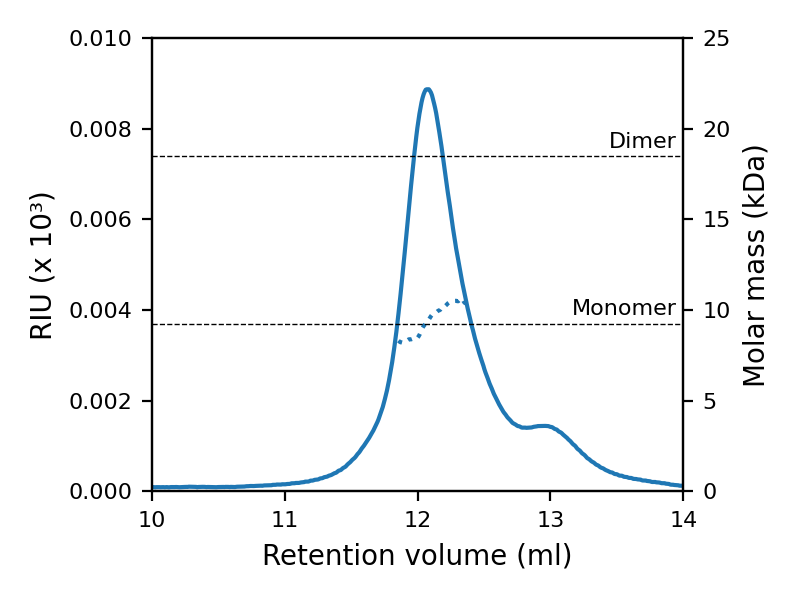

In [3]:
csv_l109R = pd.read_csv('csv/20210924_Par2Ring_L109R_S75.csv')
fig, _, _ = create_fig(csv_l109R, xlim = [10, 14], ylim1 = [0, 0.01], ylim2 = [0, 25], mw_xlim = [23.7/2, 24.8/2], 
                       c='tab:blue')
fig.savefig('Figs/L109R.png', dpi=600, transparent=True)

### WT high conc

<IPython.core.display.Javascript object>


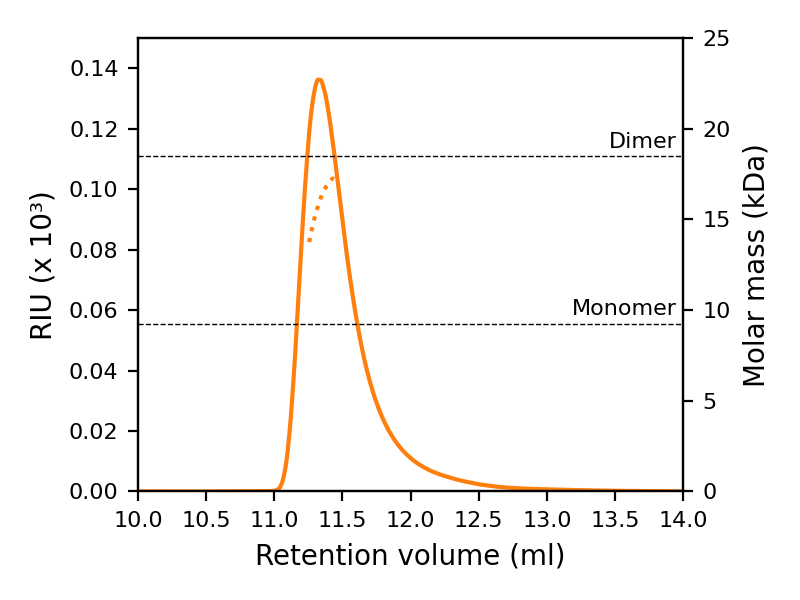

In [4]:
csv_wt_high = pd.read_csv('csv/20210924_Par2Ring_WT_S75_5mgml.csv')
fig, _, _ = create_fig(csv_wt_high, xlim = [10, 14], ylim1 = [0, 0.15], ylim2 = [0, 25], mw_xlim = [22.5/2, 24/2], 
                       c='tab:orange')
fig.savefig('Figs/wt_high.png', dpi=600, transparent=True)

### WT low conc

<IPython.core.display.Javascript object>


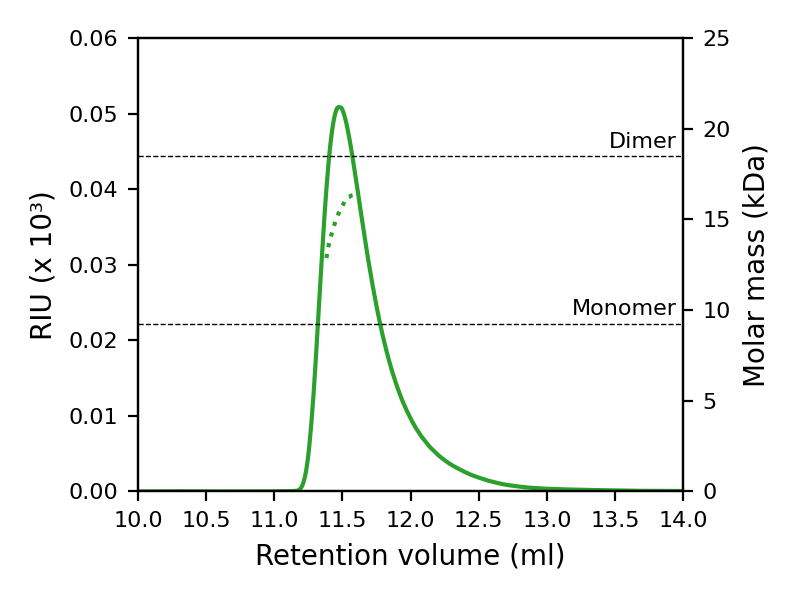

In [5]:
csv_wt_low = pd.read_csv('csv/20210927_Par2Ring_WT_S75_2mgml.csv')
fig, _, _ = create_fig(csv_wt_low, xlim = [10, 14], ylim1 = [0, 0.06], ylim2 = [0, 25], mw_xlim = [22.75/2, 23.2/2], 
                       c='tab:green')
fig.savefig('Figs/wt_low.png', dpi=600, transparent=True)

### WT both

<IPython.core.display.Javascript object>


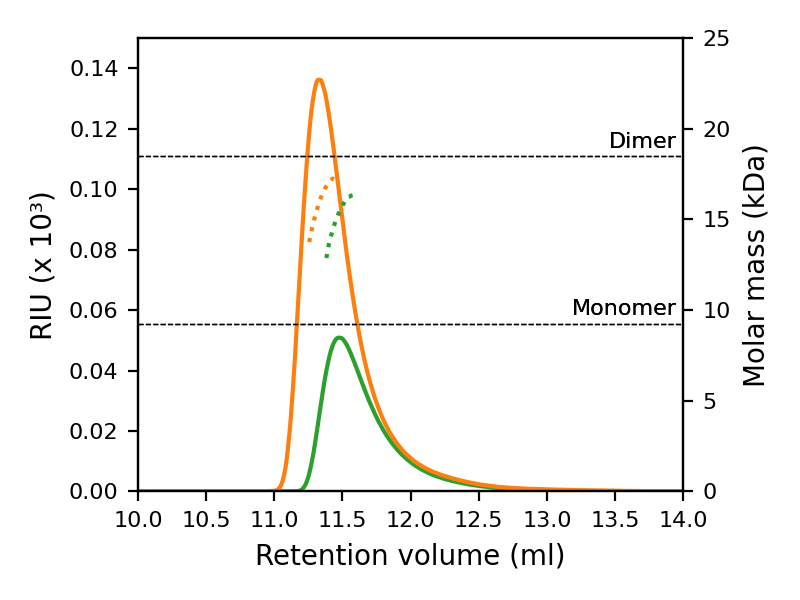

In [6]:
fig, ax1, ax2 = create_fig(csv_wt_low, xlim = [10, 14], ylim1 = [0, 0.06], ylim2 = [0, 25], 
                           mw_xlim = [22.75/2, 23.2/2], c='tab:green')
fig, _, _ = create_fig(csv_wt_high, xlim = [10, 14], ylim1 = [0, 0.15], ylim2 = [0, 25], mw_xlim = [22.5/2, 24/2], 
           fig=fig, ax1=ax1, ax2=ax2, c='tab:orange')
fig.savefig('Figs/wt_both.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


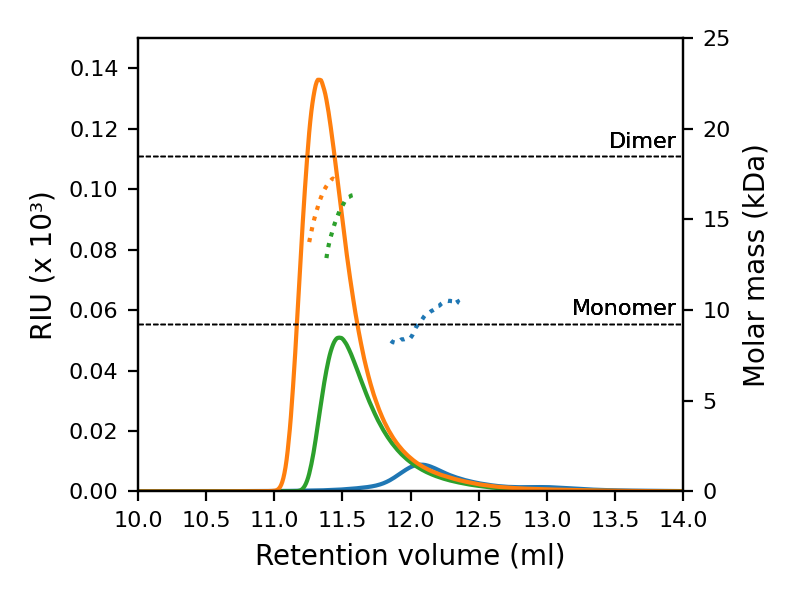

In [7]:
fig, ax1, ax2 = create_fig(csv_l109R, xlim = [10, 14], ylim1 = [0, 0.01], ylim2 = [0, 25], mw_xlim = [23.7/2, 24.8/2],
                          c='tab:blue')
fig, ax1, ax2 = create_fig(csv_wt_low, xlim = [10, 14], ylim1 = [0, 0.06], ylim2 = [0, 25], 
                           mw_xlim = [22.75/2, 23.2/2], fig=fig, ax1=ax1, ax2=ax2, c='tab:green')
fig, _, _ = create_fig(csv_wt_high, xlim = [10, 14], ylim1 = [0, 0.15], ylim2 = [0, 25], mw_xlim = [22.5/2, 24/2], 
                           fig=fig, ax1=ax1, ax2=ax2, c='tab:orange')
fig.savefig('Figs/all.png', dpi=600, transparent=True)

## Figures for talk

In [8]:
def create_fig(csv, xlim, ylim1, ylim2, mw_xlim, c, fig=None, ax1=None, ax2=None):
    
    # Create figure
    if fig is None:
        fig, ax1 = plt.subplots()
        ax2=ax1.twinx()
    
    # Modify csv
    csv.columns = ['Time', 'RIU', 'Molar mass']
    csv.replace(' ', 'NaN', inplace=True)
    csv['Molar mass'] = csv['Molar mass'].astype(float)
    
    # Crop mol weight data
    mw_bool = (csv.Time.values * 0.5 > mw_xlim[0]) * (csv.Time.values * 0.5 < mw_xlim[1])
    
    # Plot data    
    ax2.plot(csv.Time * 0.5, csv.RIU * 1000, c=c)
    ax1.plot((csv.Time)[mw_bool] * 0.5, csv['Molar mass'][mw_bool] / 1000, c=c, linestyle='dotted')
    
    # Add monomer/dimer
    ax1.axhline(9.23474, c='k', linestyle='--', linewidth=0.5)
    ax1.axhline(9.23474 * 2, c='k', linestyle='--', linewidth=0.5)
    ax1.text(27.9 * 0.5, 9.5, 'Monomer', horizontalalignment='right',verticalalignment='bottom', fontsize=8)
    ax1.text(27.9 * 0.5, 18.7, 'Dimer', horizontalalignment='right',verticalalignment='bottom', fontsize=8)

    # Set lims
    ax2.set_ylim(*ylim1)
    ax1.set_ylim(*ylim2)
    ax1.set_xlim(*xlim) 
    
    # Finalise fig
    ax1.set_xlabel('Retention volume (ml)')
    ax1.set_ylabel('Molar mass (kDa)')
    ax2.set_yticks([])
    ax1.tick_params(axis='both', labelsize=8)
    fig.set_size_inches(3,3)
    fig.tight_layout()
    
    return fig, ax1, ax2

<IPython.core.display.Javascript object>


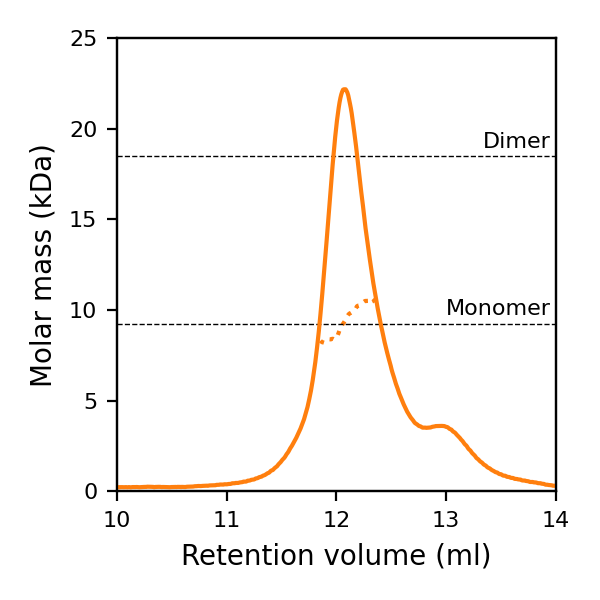

In [9]:
csv_l109R = pd.read_csv('csv/20210924_Par2Ring_L109R_S75.csv')
fig, _, _ = create_fig(csv_l109R, xlim = [10, 14], ylim1 = [0, 0.01], ylim2 = [0, 25], mw_xlim = [23.7/2, 24.8/2], 
                       c='tab:orange')
fig.savefig('Figs_for_talk/L109R_for_talk.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


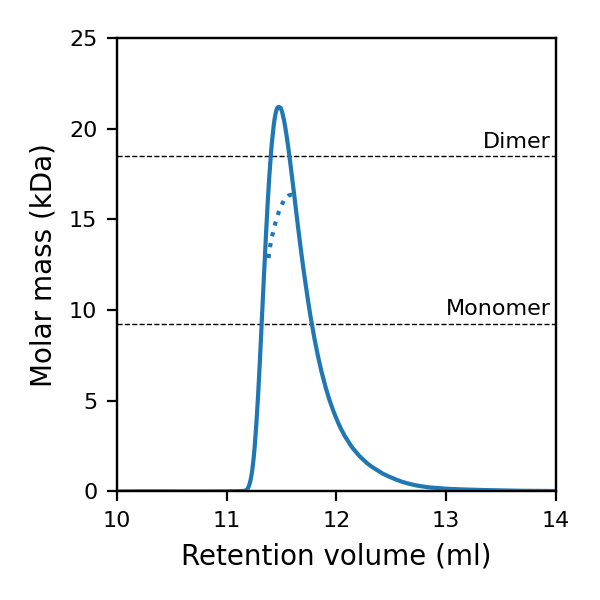

In [10]:
csv_wt_low = pd.read_csv('csv/20210927_Par2Ring_WT_S75_2mgml.csv')
fig, _, _ = create_fig(csv_wt_low, xlim = [10, 14], ylim1 = [0, 0.06], ylim2 = [0, 25], mw_xlim = [22.75/2, 23.2/2], 
                       c='tab:blue')
fig.savefig('Figs_for_talk/wt_low_for_talk.png', dpi=600, transparent=True)